# Motor Control testing
This code tests the control of the PRUSA research NEMA17 1.8 degree x axis Stepper Motors using an Arduino UNO Board and an EasyDriver. Below is the schematic of how to set up the electronics for the circuit. 

Use this notebook to setup and test your motor and arduino connection. Use motor.py functions to more easily automate motor control.

Steps to run this test:
1. Build the board as shown below. (note: the voltage supply must be greater tha 6V and be constant)
2. Connect the Arduino to this computer.
3. On this computer, open the Arduino IDE and upload the StandardFirmata sketch. (Arduino_testing.ipynb for more information)
4. Run the following code

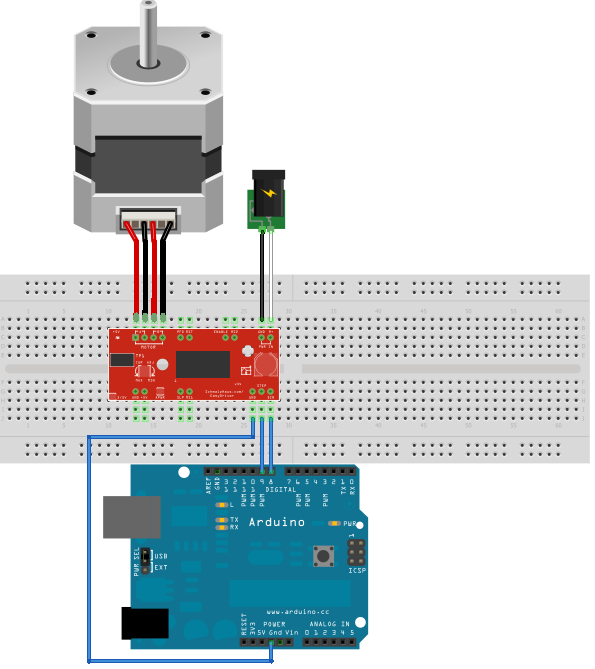

### Notes and measurements

- 1 microstep = 1 write high
- 1600 microsteps per revolution
- threads per inch = 13 (one thread is one revolution)

- 1600 steps = 1 revolution = 1/13 inches = 0.195384615 cms
- 1 step = 0.00012211538437500001 cm = 0.122 micrometer

- 5 cm ~ 40944 microsteps

- Length of the rod = 29 cm
- Length of the mounting piece = 5.1 cm

In [1]:
import pyfirmata
from motor import Motor

In [2]:
# Use Arduino IDE to find the port name under Tools->Port
port_name = 'COM3'
board = pyfirmata.Arduino(port_name) # connects Arduino to python

In [3]:
# Setup the pins on the arduino
step_pin = 12 # controls the steps taken by the motor
dir_pin = 13 # controls the direction of the motor
name = 'TestMotor' # Defines the name of the motor, used in position_name.csv to keep track of position

In [10]:
motor = Motor(board, step_pin, dir_pin, name)
motor.PrintInfo()

FileNotFoundError: [Errno 2] No such file or directory: 'MotorPositions/position_TestMotor.csv'

In [5]:
# Move the motor 15 mm in one direction
motor.MoveMotor(15) # mm

In [28]:
# Move the motor 10 mm in the opposite direction
motor.MoveMotor(-10) # mm

In [29]:
# Print the currrent position of the motor
motor.GetCurrentPosition() # mm

9.99

In [21]:
# Rotate the motor certain number of degrees, rather than measuring in mm
motor.Rotate(360) # degrees

# Testing button to stop motor from reaching the edge

Based on arduino pyfirmata tutorial (https://realpython.com/arduino-python/)

Motor.py also has the functionality to pair with a button placed at some edge to prevent the motor from running into the edge. Wire the button as shown below. By default, the Motor class does not include a button.


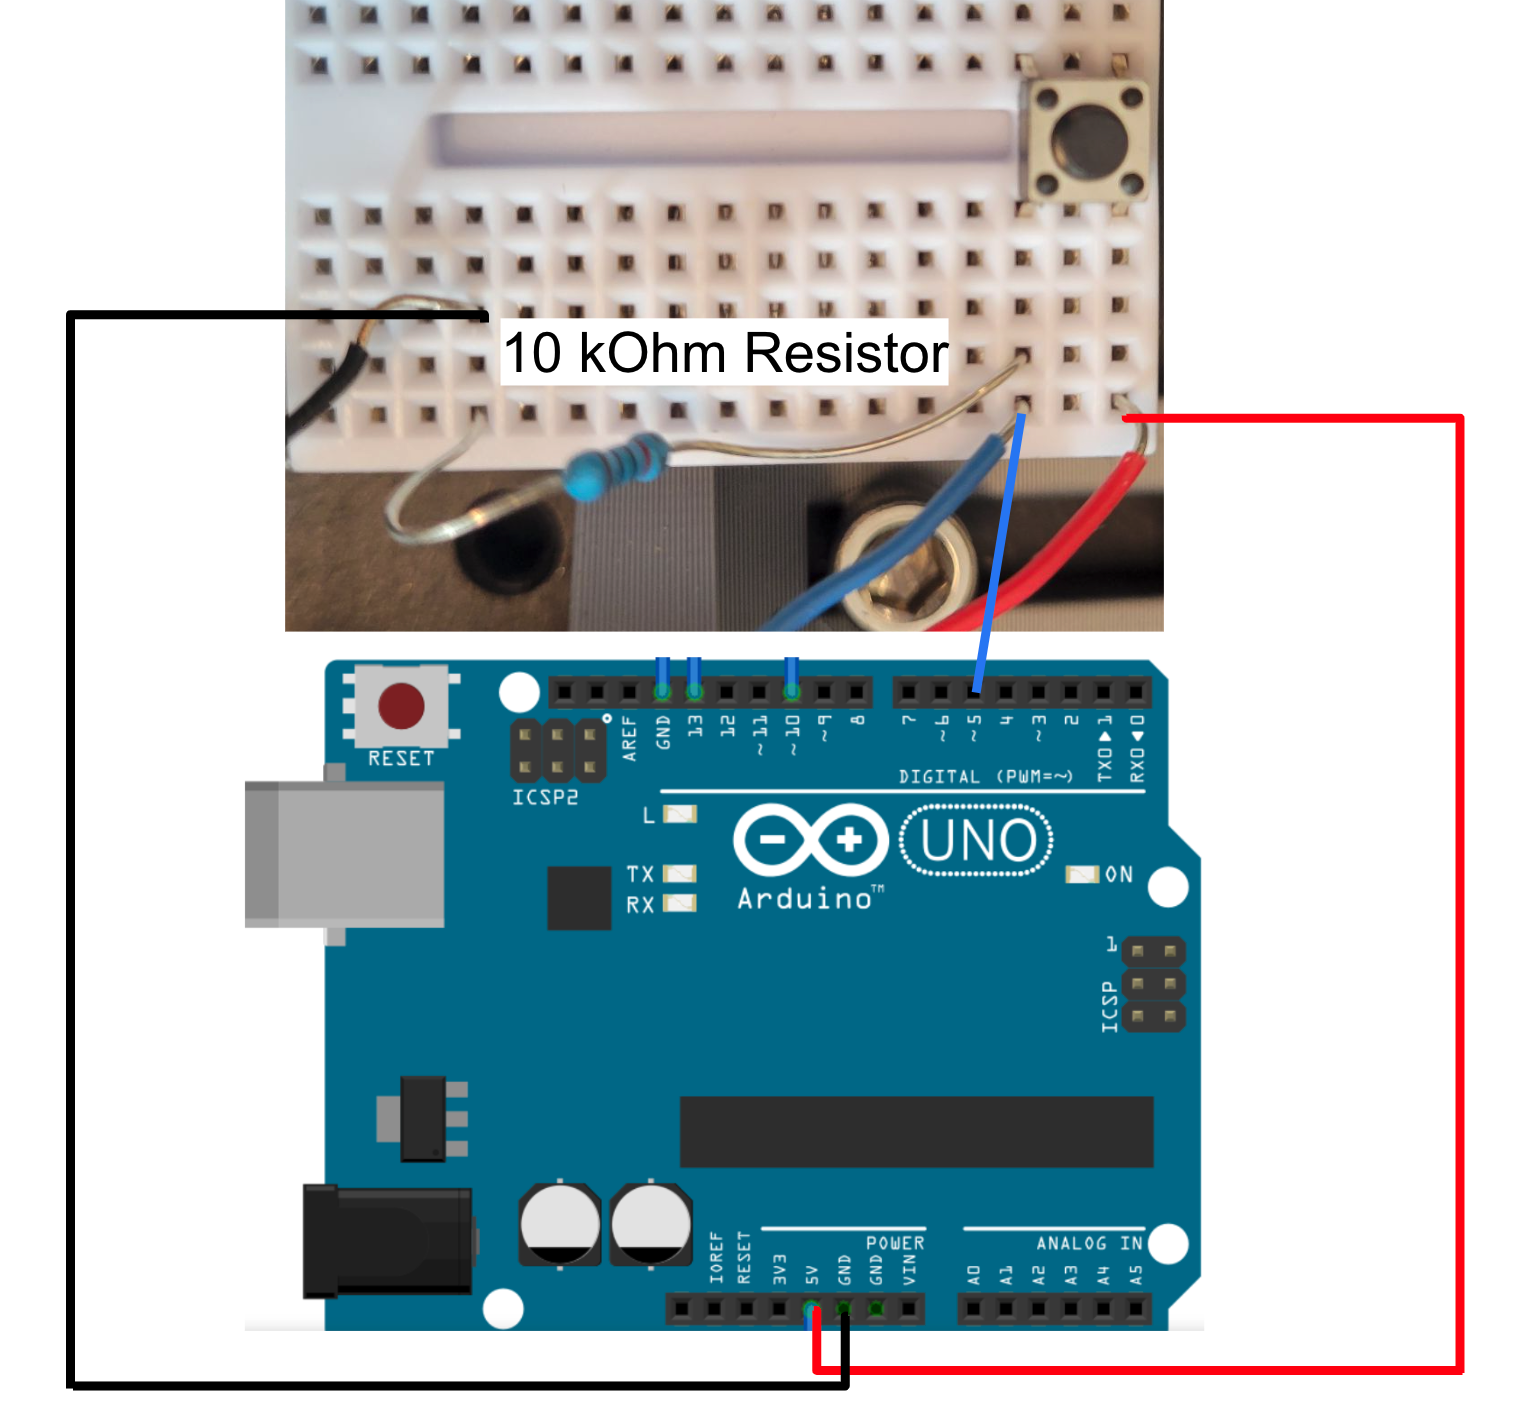

In [13]:
# Setup the pins on the arduino
step_pin = 12 # controls the steps taken by the motor
dir_pin = 13 # controls the direction of the motor
button_pin = 5 # stops the motor if pushed
name = 'TestMotor'

In [4]:
# Setup the Arduino to take input from button (to stop motor)
# make sure to run only once
it = pyfirmata.util.Iterator(board)
it.start()

board.digital[button_pin].mode = pyfirmata.INPUT # Must set button pin as an input

In [14]:
motor = Motor(board, step_pin, dir_pin, name, button_pin)
motor.PrintInfo()

Motor name: TestMotor
    Step pin: 12
    Dir pin: 13
    Button pin: 5
    Position: 9.965 mm


In [15]:
# Press button during movement to stop motor
motor.MoveMotor(-30) # mm

--------------------WARNING!---------------------
TestMotor motor has reached edge
Moved away from edge, new positions is 14.965 mm
-------------------------------------------------
